Melhores hiperparâmetros: {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Acurácia da SVM com melhores hiperparâmetros: 1.0
Confusion Matrix:
[[507   0]
 [  0 493]]


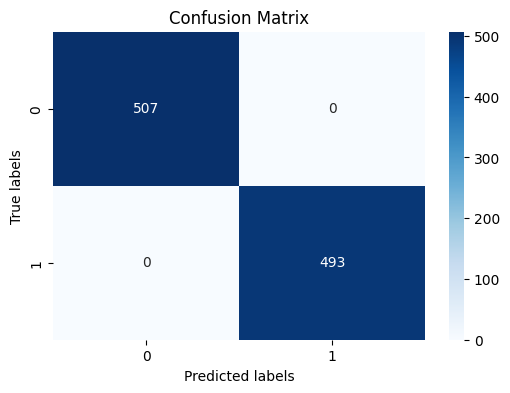

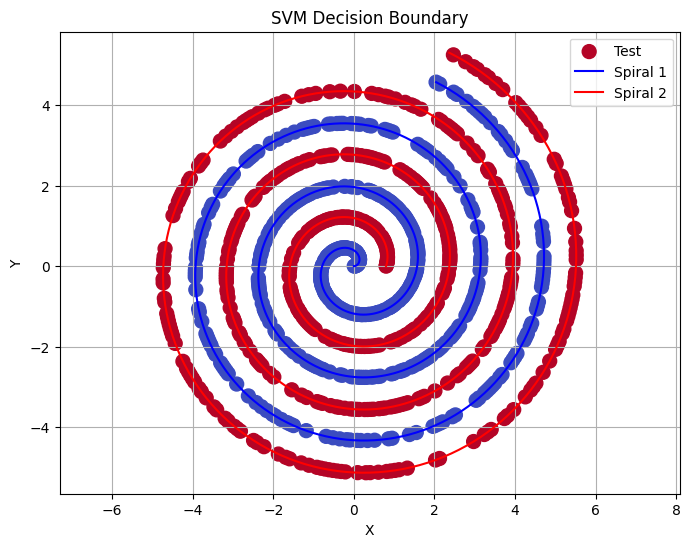

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Definir as equações das espirais
def spiral_1(theta):
    x = (theta / 4) * np.cos(theta)
    y = (theta / 4) * np.sin(theta)
    return x, y

def spiral_2(theta):
    x = ((theta / 4) + 0.8) * np.cos(theta)
    y = ((theta / 4) + 0.8) * np.sin(theta)
    return x, y

# Gerar pontos das espirais
theta_1 = np.linspace(0, 20, 1000)
x1, y1 = spiral_1(theta_1)

theta_2 = np.linspace(0, 20, 1000)
x2, y2 = spiral_2(theta_2)

# Gerar dados para espiral 1
spiral_1_data = np.column_stack((x1, y1))
labels_1 = np.zeros(len(theta_1))

# Gerar dados para espiral 2
spiral_2_data = np.column_stack((x2, y2))
labels_2 = np.ones(len(theta_2))

# Combinar dados e rótulos
X = np.concatenate((spiral_1_data, spiral_2_data), axis=0)
y = np.concatenate((labels_1, labels_2))

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Definir os parâmetros para o grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Construir o modelo SVM
svm_model = SVC()

# Realizar a pesquisa em grade
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obter os melhores hiperparâmetros
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Fazer previsões com o melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia da SVM com melhores hiperparâmetros: {accuracy}')

# Calcular matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plotar matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


# Visualizar a separação de classes
plt.figure(figsize=(8, 6))

# Plotar os pontos de teste
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm, marker='o', s=100, label='Test')
plt.plot(x1, y1, label='Spiral 1', color='b')
plt.plot(x2, y2, label='Spiral 2', color='r')

plt.title('SVM Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Acurácia da SVM: 0.98
Confusion Matrix:
[[806  12]
 [ 20 762]]


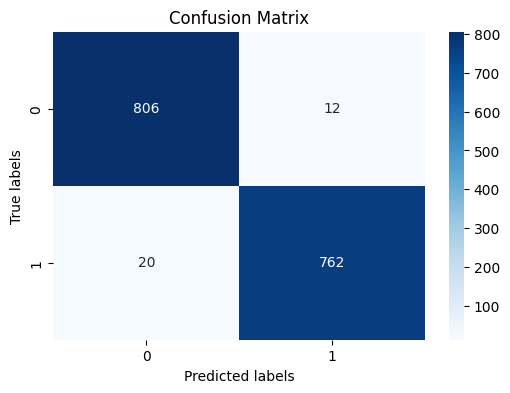

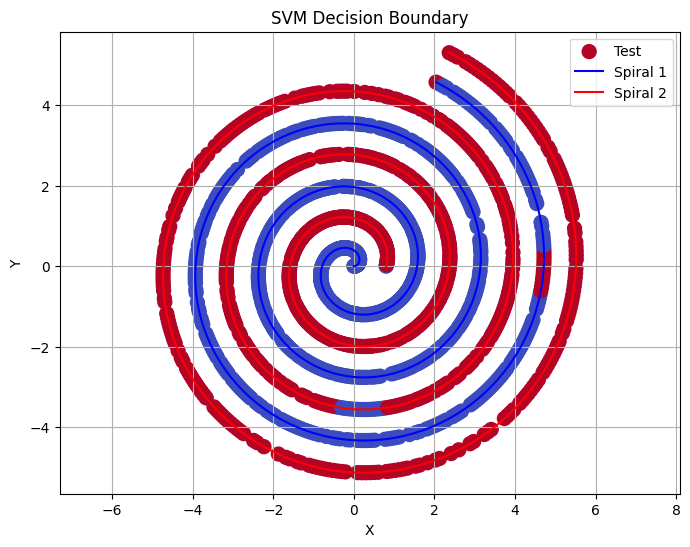

In [3]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Construir o modelo SVM
svm_model = SVC(C=100, kernel='rbf', gamma='auto', degree=2)

# Treinar o modelo SVM
svm_model.fit(X_train, y_train)

# Fazer previsões
y_pred = svm_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia da SVM: {accuracy}')

# Calcular matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plotar matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Visualizar a separação de classes
plt.figure(figsize=(8, 6))

# Plotar os pontos de teste
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm, marker='o', s=100, label='Test')
plt.plot(x1, y1, label='Spiral 1', color='b')
plt.plot(x2, y2, label='Spiral 2', color='r')

plt.title('SVM Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
